In [7]:
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
import Entropy_Metrics as es
import glob
import json

In [8]:
"""
importing the network files to run the proper analysis, 
place the name of the folder containing the network adjaceny matrix 
and point cloud filer in the string variable
"""

string = ""
graph_families = glob.glob(string +"/PC10???")

# sectioning them off by node number
graph_families_100 = graph_families[:20]
graph_families_200 = graph_families[20:40]
graph_families_300 = graph_families[40:-1]

"""
key and network_sort are here to sort the network data file strings in order of 
least to greatest lloyd's itteration. key is the key function for the sorted function that 
network_sort acts as a wrapper of.
"""


def key(location):
    lloyds = location.split("_")
    number = [char for char in lloyds[-2]][6:]
    number = "".join(number)
    return int(number)


def network_sort(l):
    """
    Sort a list in the way that humans expect.
    """
    return sorted(l, key=key)

In [9]:
"""
collecting the global paths of all graphs of a certian node number and then 
concatonating all coordinates file and adjacency matrix file paths

the structure of the list starts out with one family of graphs-- 101 of its lloyds itterations--
and concattonates all graph families after it
"""

graph_coordinates_100 = []
adjacency_matrices_100 = []
for i in graph_families_100:
    graph_coordinates_100 += network_sort((glob.glob(i + "/*_xy.csv")))
    adjacency_matrices_100 += network_sort((glob.glob(i + "/*_Adj.csv")))

graph_coordinates_200 = []
adjacency_matrices_200 = []
for i in graph_families_200:
    graph_coordinates_200 += network_sort((glob.glob(i + "/*_xy.csv")))
    adjacency_matrices_200 += network_sort(glob.glob(i + "/*_Adj.csv"))

graph_coordinates_300 = []
adjacency_matrices_300 = []
for i in graph_families_300:
    graph_coordinates_300 += network_sort(glob.glob(i + "/*_xy.csv"))
    adjacency_matrices_300 += network_sort(glob.glob(i + "/*_Adj.csv"))

In [10]:
"""
Here we calculate the entropy metrics and resistances of each network.
The numbers after the underlines refer to the amount of notes in the network.
"""

"""
These numpy arrays to store the network statestics
"""
length = len(adjacency_matrices_100)
resistances_100 = np.zeros(length)
degree_entropies_100 = np.zeros(length)
edge_entropies_100 = np.zeros(length)
conductance_entropies_100 = np.zeros(length)

length = len(adjacency_matrices_200)
resistances_200 = np.zeros(length)
degree_entropies_200 = np.zeros(length)
edge_entropies_200 = np.zeros(length)
conductance_entropies_200 = np.zeros(length)

length = len(adjacency_matrices_300)
resistances_300 = np.zeros(length)
degree_entropies_300 = np.zeros(length)
edge_entropies_300 = np.zeros(length)
conductance_entropies_300 = np.zeros(length)

"""
Below we compute the resistances, degree entropies, edge entropies, and conductance entropies
of each network. 

adj is a singular unweighted adjacency matrix and coords is the corrosponding
array which stores the coordinates of each node
"""

for i, adjacency_matrix_100 in enumerate(adjacency_matrices_100):
    coords = np.loadtxt(open(graph_coordinates_100[i], "r"), delimiter=",")
    adj = np.loadtxt(open(adjacency_matrix_100, "r"), delimiter=",")
    weighted_adj = es.weight_adj(coords, adj)
    resistances_100[i] = es.resistance(coords, adj)
    edge_entropies_100[i] = es.edge_entropy(weighted_adj)
    degree_entropies_100[i] = es.degree_entropy(adj)
    conductance_entropies_100[i] = es.conductance_entropy(weighted_adj)


for i, adjacency_matrix_200 in enumerate(adjacency_matrices_200):
    coords = np.loadtxt(open(graph_coordinates_200[i], "r"), delimiter=",")
    adj = np.loadtxt(open(adjacency_matrix_200, "r"), delimiter=",")
    weighted_adj = es.weight_adj(coords, adj)
    resistances_200[i] = es.resistance(coords, adj)
    edge_entropies_200[i] = es.edge_entropy(weighted_adj)
    degree_entropies_200[i] = es.degree_entropy(adj)
    conductance_entropies_200[i] = es.conductance_entropy(weighted_adj)


for i, adjacency_matrix_300 in enumerate(adjacency_matrices_300):
    coords = np.loadtxt(open(graph_coordinates_300[i], "r"), delimiter=",")
    adj = np.loadtxt(open(adjacency_matrix_300, "r"), delimiter=",")
    weighted_adj = es.weight_adj(coords, adj)
    resistances_300[i] = es.resistance(coords, adj)
    edge_entropies_300[i] = es.edge_entropy(weighted_adj)
    degree_entropies_300[i] = es.degree_entropy(adj)
    conductance_entropies_300[i] = es.conductance_entropy(weighted_adj)

In [11]:
"""
This reshapes each array into a 2d numpy array where each column is a llyods iteration and
each row is a family of networks
"""

"""
Below is where the second dimension of the array is calculated, with the number of columns assumed
to be 101 as each network family contains 101 lloyds iterations.
"""

length_300 = len(adjacency_matrices_300) // 101
length_200 = len(adjacency_matrices_200) // 101
length_100 = len(adjacency_matrices_100) // 101

resistances_300 = np.reshape(resistances_300, (length_300, 101))
resistances_200 = np.reshape(resistances_200, (length_200, 101))
resistances_100 = np.reshape(resistances_100, (length_100, 101))

degree_entropies_300 = np.reshape(degree_entropies_300, (length_300, 101))
degree_entropies_200 = np.reshape(degree_entropies_200, (length_200, 101))
degree_entropies_100 = np.reshape(degree_entropies_100, (length_100, 101))

edge_entropies_300 = np.reshape(edge_entropies_300, (length_300, 101))
edge_entropies_200 = np.reshape(edge_entropies_200, (length_200, 101))
edge_entropies_100 = np.reshape(edge_entropies_100, (length_100, 101))

conductance_entropies_300 = np.reshape(conductance_entropies_300, (length_300, 101))
conductance_entropies_200 = np.reshape(conductance_entropies_200, (length_200, 101))
conductance_entropies_100 = np.reshape(conductance_entropies_100, (length_100, 101))

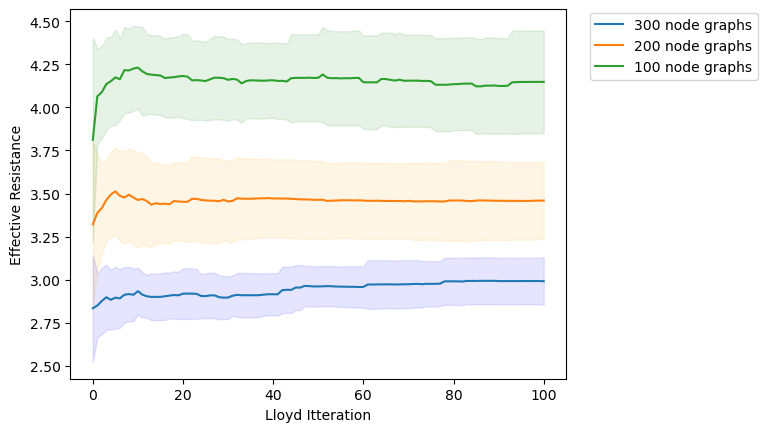

In [12]:
"""
Here we compute the std and mean of resistance per iteration and plot
"""

resistances_300_std = np.std(resistances_300, axis=0)
resistances_200_std = np.std(resistances_200, axis=0)
resistances_100_std = np.std(resistances_100, axis=0)

resistances_300_mean = np.mean(resistances_300, axis=0)
resistances_200_mean = np.mean(resistances_200, axis=0)
resistances_100_mean = np.mean(resistances_100, axis=0)

plt.plot(resistances_300_mean, label="300 node graphs")
plt.fill_between(
    range(len(resistances_300_mean)),
    (resistances_300_mean - resistances_300_std),
    (resistances_300_mean + resistances_300_std),
    color="b",
    alpha=0.1,
)
plt.plot(resistances_200_mean, label="200 node graphs")
plt.fill_between(
    range(len(resistances_200_mean)),
    (resistances_200_mean - resistances_200_std),
    (resistances_200_mean + resistances_200_std),
    color="orange",
    alpha=0.1,
)
plt.plot(resistances_100_mean, label="100 node graphs")
plt.fill_between(
    range(len(resistances_100_mean)),
    (resistances_100_mean - resistances_100_std),
    (resistances_100_mean + resistances_100_std),
    color="g",
    alpha=0.1,
)
plt.xlabel("Lloyd Itteration")
plt.ylabel("Effective Resistance")
plt.legend(bbox_to_anchor=(1.40, 0.9), loc="center right")
plt.show()

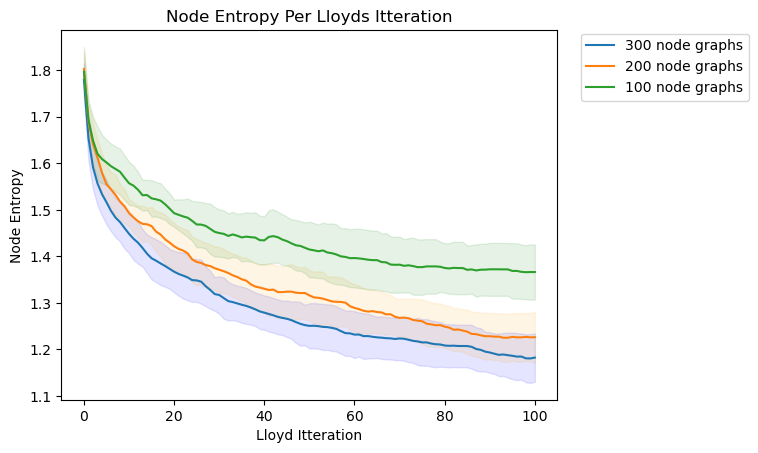

In [13]:
"""
Here we compute the std and mean of degree entropy per iteration and plot
"""

degree_entropies_300_std = np.std(degree_entropies_300, axis=0)
degree_entropies_200_std = np.std(degree_entropies_200, axis=0)
degree_entropies_100_std = np.std(degree_entropies_100, axis=0)

degree_entropies_300_mean = np.mean(degree_entropies_300, axis=0)
degree_entropies_200_mean = np.mean(degree_entropies_200, axis=0)
degree_entropies_100_mean = np.mean(degree_entropies_100, axis=0)

plt.plot(degree_entropies_300_mean, label="300 node graphs")
plt.fill_between(
    range(len(degree_entropies_300_mean)),
    (degree_entropies_300_mean - degree_entropies_300_std),
    (degree_entropies_300_mean + degree_entropies_300_std),
    color="b",
    alpha=0.1,
)
plt.plot(degree_entropies_200_mean, label="200 node graphs")
plt.fill_between(
    range(len(degree_entropies_200_mean)),
    (degree_entropies_200_mean - degree_entropies_200_std),
    (degree_entropies_200_mean + degree_entropies_200_std),
    color="orange",
    alpha=0.1,
)
plt.plot(degree_entropies_100_mean, label="100 node graphs")
plt.fill_between(
    range(len(degree_entropies_100_mean)),
    (degree_entropies_100_mean - degree_entropies_100_std),
    (degree_entropies_100_mean + degree_entropies_100_std),
    color="g",
    alpha=0.1,
)
plt.xlabel("Lloyd Itteration")
plt.ylabel("Node Entropy")
plt.title("Node Entropy Per Lloyds Itteration")
plt.legend(bbox_to_anchor=(1.40, 0.9), loc="center right")
plt.show()

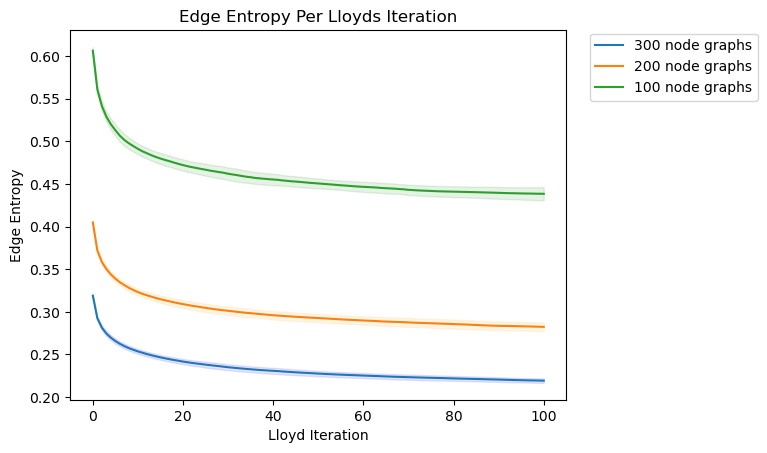

In [14]:
"""
Here we compute the std and mean of edge entropy per iteration and plot
"""

edge_entropies_300_std = np.std(edge_entropies_300, axis=0) / np.sqrt(300)
edge_entropies_200_std = np.std(edge_entropies_200, axis=0) / np.sqrt(200)
edge_entropies_100_std = np.std(edge_entropies_100, axis=0) / np.sqrt(100)

edge_entropies_300_mean = np.mean(edge_entropies_300, axis=0) / np.sqrt(300)
edge_entropies_200_mean = np.mean(edge_entropies_200, axis=0) / np.sqrt(200)
edge_entropies_100_mean = np.mean(edge_entropies_100, axis=0) / np.sqrt(100)


plt.plot(edge_entropies_300_mean, label="300 node graphs")
plt.fill_between(
    range(len(edge_entropies_300_mean)),
    (edge_entropies_300_mean - edge_entropies_300_std),
    (edge_entropies_300_mean + edge_entropies_300_std),
    color="b",
    alpha=0.1,
)
plt.plot(edge_entropies_200_mean, label="200 node graphs")
plt.fill_between(
    range(len(edge_entropies_200_mean)),
    (edge_entropies_200_mean - edge_entropies_200_std),
    (edge_entropies_200_mean + edge_entropies_200_std),
    color="orange",
    alpha=0.1,
)
plt.plot(edge_entropies_100_mean, label="100 node graphs")
plt.fill_between(
    range(len(edge_entropies_100_mean)),
    (edge_entropies_100_mean - edge_entropies_100_std),
    (edge_entropies_100_mean + edge_entropies_100_std),
    color="g",
    alpha=0.1,
)
plt.xlabel("Lloyd Iteration")
plt.ylabel("Edge Entropy")
plt.title("Edge Entropy Per Lloyds Iteration")
plt.legend(bbox_to_anchor=(1.40, 0.9), loc="center right")
plt.show()

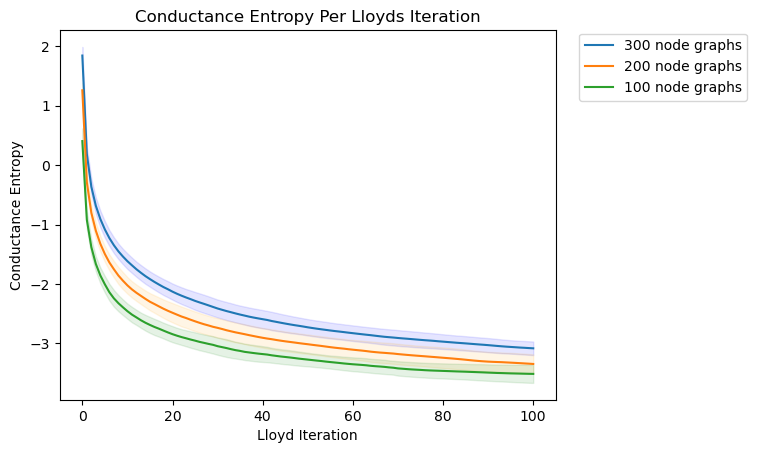

In [15]:
"""
Here we compute the std and mean of the conductance entropy per itteration and plot
"""

conductance_entropies_300_std = np.std(conductance_entropies_300, axis=0)
conductance_entropies_200_std = np.std(conductance_entropies_200, axis=0)
conductance_entropies_100_std = np.std(conductance_entropies_100, axis=0)

conductance_entropies_300_mean = np.mean(conductance_entropies_300, axis=0)
conductance_entropies_200_mean = np.mean(conductance_entropies_200, axis=0)
conductance_entropies_100_mean = np.mean(conductance_entropies_100, axis=0)


plt.plot(conductance_entropies_300_mean, label="300 node graphs")
plt.fill_between(
    range(len(conductance_entropies_300_mean)),
    (conductance_entropies_300_mean - conductance_entropies_300_std),
    (conductance_entropies_300_mean + conductance_entropies_300_std),
    color="b",
    alpha=0.1,
)
plt.plot(conductance_entropies_200_mean, label="200 node graphs")
plt.fill_between(
    range(len(conductance_entropies_200_mean)),
    (conductance_entropies_200_mean - conductance_entropies_200_std),
    (conductance_entropies_200_mean + conductance_entropies_200_std),
    color="orange",
    alpha=0.1,
)
plt.plot(conductance_entropies_100_mean, label="100 node graphs")
plt.fill_between(
    range(len(conductance_entropies_100_mean)),
    (conductance_entropies_100_mean - conductance_entropies_100_std),
    (conductance_entropies_100_mean + conductance_entropies_100_std),
    color="g",
    alpha=0.1,
)
plt.xlabel("Lloyd Iteration")
plt.ylabel("Conductance Entropy")
plt.title("Conductance Entropy Per Lloyds Iteration")
plt.legend(bbox_to_anchor=(1.40, 0.9), loc="center right")
plt.show()

In [16]:
"""
Here we save the statistical data and the raw resistance and entropy data into two jsons and 
export them into the folder
""" 

statistics_dictionary = {
    "300 nodes": {
        "resistances": {
            "std": resistances_300_std.tolist(),
            "mean": resistances_300_mean.tolist(),
        },
        "edge entropy": {
            "std": edge_entropies_300_std.tolist(),
            "mean": edge_entropies_300_mean.tolist(),
        },
        "conductance entropy": {
            "std": conductance_entropies_300_std.tolist(),
            "mean": conductance_entropies_300_mean.tolist(),
        },
        "degree entropy": {
            "std": degree_entropies_300_std.tolist(),
            "mean": degree_entropies_300_mean.tolist(),
        },
    },
    "200 nodes": {
        "resistances": {
            "std": resistances_200_std.tolist(),
            "mean": resistances_200_mean.tolist(),
        },
        "edge entropy": {
            "std": edge_entropies_200_std.tolist(),
            "mean": edge_entropies_200_mean.tolist(),
        },
        "conductance entropy": {
            "std": conductance_entropies_200_std.tolist(),
            "mean": conductance_entropies_200_mean.tolist(),
        },
        "degree entropy": {
            "std": degree_entropies_200_std.tolist(),
            "mean": degree_entropies_200_mean.tolist(),
        },
    },
    "100 nodes": {
        "resistances": {
            "std": resistances_100_std.tolist(),
            "mean": resistances_100_mean.tolist(),
        },
        "edge entropy": {
            "std": edge_entropies_100_std.tolist(),
            "mean": edge_entropies_100_mean.tolist(),
        },
        "conductance entropy": {
            "std": conductance_entropies_100_std.tolist(),
            "mean": conductance_entropies_100_mean.tolist(),
        },
        "degree entropy": {
            "std": degree_entropies_100_std.tolist(),
            "mean": degree_entropies_100_mean.tolist(),
        },
    },
}


data_dictionary = {
    "300 nodes": {
        "resistances": resistances_300.tolist(),
        "edge entropy": edge_entropies_300.tolist(),
        "conductance entropy": conductance_entropies_300.tolist(),
        "degree entropy": degree_entropies_300.tolist(),
    },
    "200 nodes": {
        "resistances": resistances_200.tolist(),
        "edge entropy": edge_entropies_200.tolist(),
        "conductance entropy": conductance_entropies_200.tolist(),
        "degree entropy": degree_entropies_200.tolist(),
    },
    "100 nodes": {
        "resistances": resistances_100.tolist(),
        "edge entropy": edge_entropies_100.tolist(),
        "conductance entropy": conductance_entropies_100.tolist(),
        "degree entropy": degree_entropies_100.tolist(),
    },
}

with open("Network_Statistics", "w") as fp:
    json.dump(statistics_dictionary, fp)
with open("Network_Data", "w") as fp:
    json.dump(data_dictionary, fp)